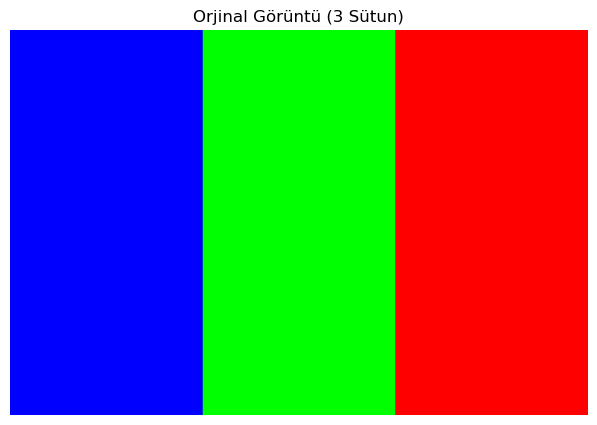

In [7]:
#OpenCV kullanarak RGB ve Grayscale dönüşüm, çözünürlük değişimi, kesme, resize, rotate işlemleri.
import cv2
import numpy as np
import matplotlib.pyplot as plt

height, width = 400, 600
image = np.zeros((height, width, 3), dtype=np.uint8)

image[:, 0:200] = [255, 0, 0]    # Kırmızı
image[:, 200:400] = [0, 255, 0]  # Yeşil
image[:, 400:600] = [0, 0, 255]  # Mavi

# RGB formatına çevirme
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Görüntüyü gösterme
plt.figure(figsize=(8, 5))
plt.imshow(image_rgb)
plt.title('Orjinal Görüntü (3 Sütun)')
plt.axis('off')
plt.show()

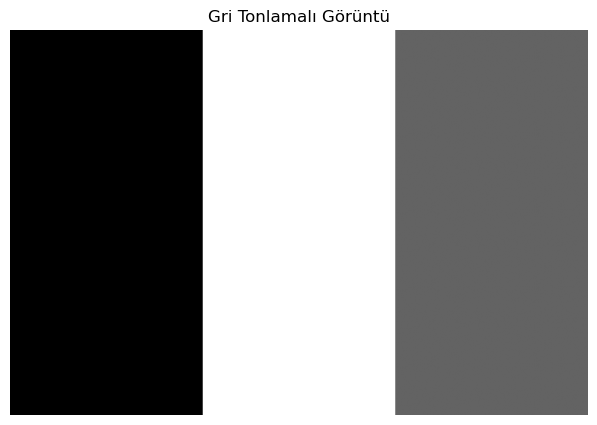

In [8]:
#Grayscale dönüşüm
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8, 5))
plt.imshow(gray_image, cmap='gray')
plt.title('Gri Tonlamalı Görüntü')
plt.axis('off')
plt.show()

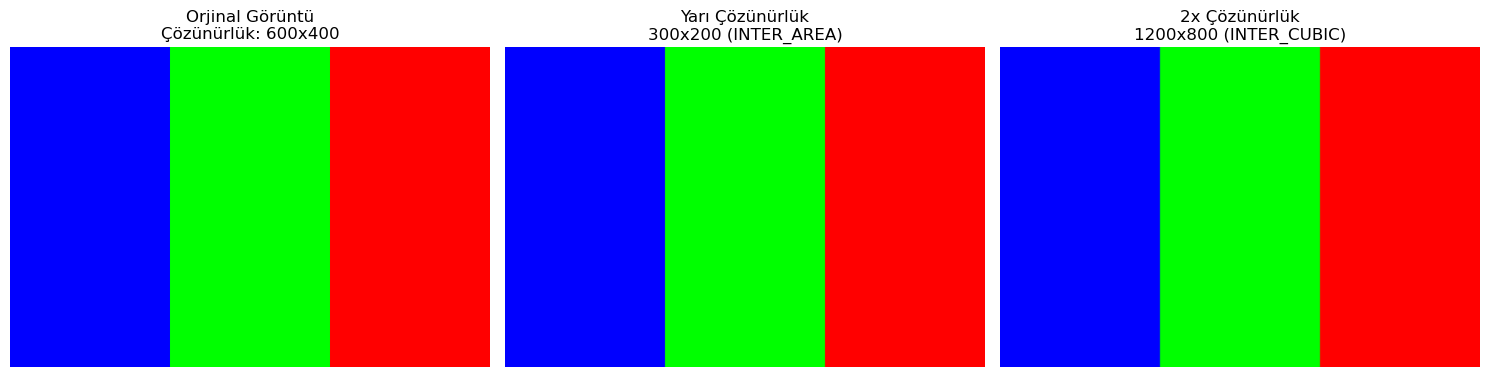

In [14]:
#çözünürlük değişimi
half_resolution = cv2.resize(image_rgb, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Çözünürlüğü 2 kat artırma (INTER_CUBIC yöntemi - büyütme için uygun)
double_resolution = cv2.resize(image_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title(f'Orjinal Görüntü\nÇözünürlük: {image_rgb.shape[1]}x{image_rgb.shape[0]}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(half_resolution)
plt.title(f'Yarı Çözünürlük\n{half_resolution.shape[1]}x{half_resolution.shape[0]} (INTER_AREA)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(double_resolution)
plt.title(f'2x Çözünürlük\n{double_resolution.shape[1]}x{double_resolution.shape[0]} (INTER_CUBIC)')
plt.axis('off')

plt.tight_layout()
plt.show()

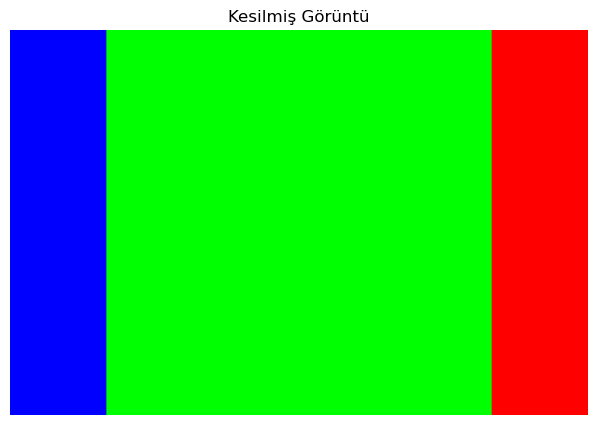

In [15]:
#kesme
cropped_image = image_rgb[100:300, 150:450]  # yükseklik, genişlik

plt.figure(figsize=(8, 5))
plt.imshow(cropped_image)
plt.title('Kesilmiş Görüntü')
plt.axis('off')
plt.show()

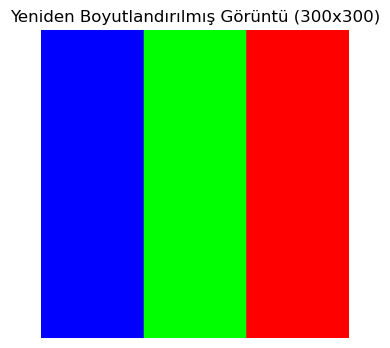

In [16]:
(resize)
resize_dim = (300, 300)
image_resized = cv2.resize(image, resize_dim, interpolation=cv2.INTER_LINEAR)

# RGB'ye çevir
image_resized_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 4))
plt.imshow(image_resized_rgb)
plt.title('Yeniden Boyutlandırılmış Görüntü (300x300)')
plt.axis('off')
plt.show()


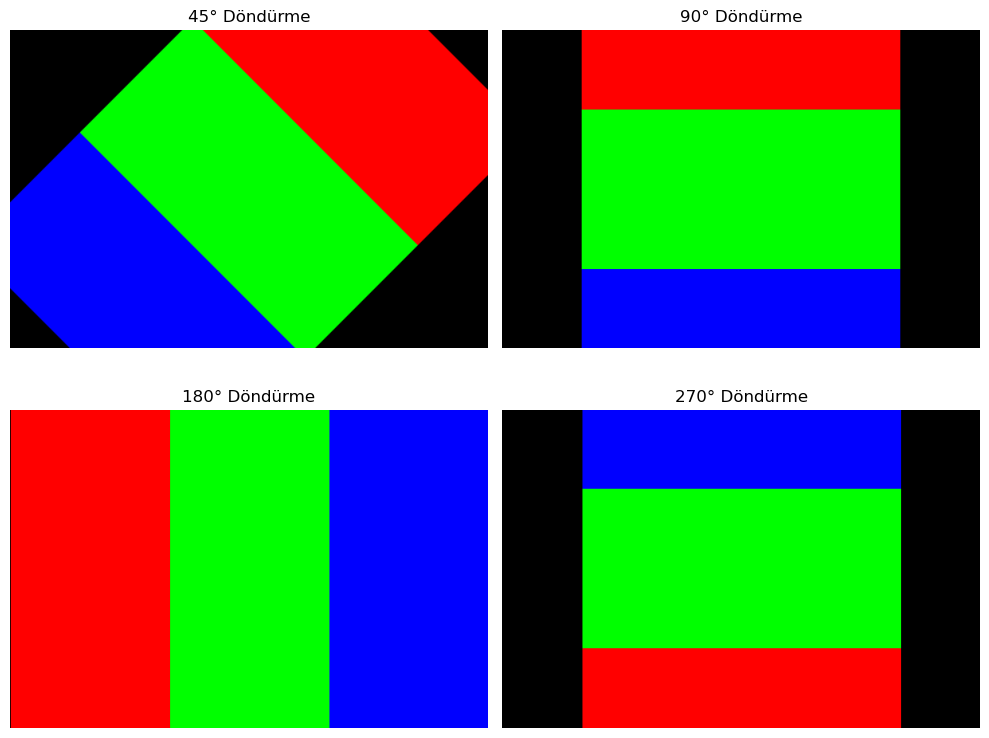

In [17]:
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, (w, h))

# Açı listesi
angles = [45, 90, 180, 270]

# Döndürülmüş görüntüleri göster
plt.figure(figsize=(10, 8))
for i, angle in enumerate(angles):
    rotated = rotate_image(image, angle)
    rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.imshow(rotated_rgb)
    plt.title(f"{angle}° Döndürme")
    plt.axis('off')

plt.tight_layout()
plt.show()